In [1]:
import numpy as np

In [2]:
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt


In [3]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [4]:
consumer_key    = '0HwwLndFzphxpc0FtcbTL1FHB'
consumer_secret = '9s0bWRPf99KNseJUtaWRw2XFBVfyvizGEtO2OpSlDm7AcArSaF'

access_token  = '1182380009215840256-5h6QC18s7vaOzMN51mnN0sjKCshbBg'
access_token_secret = 'F1A2XGx3C0FXFK6AIRBFRQDmnkP3KOBYxWCiGgUz4dVek'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
fetch_tweets=tweepy.Cursor(api.search, q="#sbin",count=100, lang ="en",since="2019-11-25", tweet_mode="extended").items()

In [6]:
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [7]:
print(data)

           Date                                             Tweets
0    2020-11-25  #sbin\nToday giving nice swing both side..\nNo...
1    2020-11-25  Buy 1 CURMON #SBIN contracts at 243.45, Sell 2...
2    2020-11-25  #SBIN - SBIN LONG - TradingView - https://t.co...
3    2020-11-25  State Bank India target has been reached #Shor...
4    2020-11-25  Nifty50 trade above 13,100. Nifty Bank 30000+ ...
..          ...                                                ...
212  2020-11-16  RT @PAVLeader: Here is an example of #SBIN to ...
213  2020-11-16  RT @PAVLeader: Here is an example of #SBIN to ...
214  2020-11-16  RT @PAVLeader: Here is an example of #SBIN to ...
215  2020-11-16  RT @PAVLeader: Here is an example of #SBIN to ...
216  2020-11-16  RT @PAVLeader: Here is an example of #SBIN to ...

[217 rows x 2 columns]


In [8]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date']=row["Date"]
    #cdata.set_value(index,'Date',row["Date"])
    cdata.at[index,'Tweets']=my_new_string
    #cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
print(cdata.dtypes)

Date      object
Tweets    object
dtype: object


In [9]:
cdata

,Date,Tweets
0,2020-11-25,sbinToday giving nice swing both sideNo need o...
1,2020-11-25,Buy 1 CURMON SBIN contracts at 24345 Sell 2 CU...
2,2020-11-25,SBIN SBIN LONG TradingView httpstcoiPcsVO0uAM
3,2020-11-25,State Bank India target has been reached Short...
4,2020-11-25,Nifty50 trade above 13100 Nifty Bank 30000 in ...
...,...,...
212,2020-11-16,RT PAVLeader Here is an example of SBIN to lea...
213,2020-11-16,RT PAVLeader Here is an example of SBIN to lea...
214,2020-11-16,RT PAVLeader Here is an example of SBIN to lea...
215,2020-11-16,RT PAVLeader Here is an example of SBIN to lea...


In [10]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [11]:

indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        #ccdata.set_value(indx,'Date',get_date)
        ccdata.at[indx,'Tweets']=get_tweet
        #ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

In [12]:
ccdata

,Date,Tweets
0,2020-11-25,sbinToday giving nice swing both sideNo need o...
1,2020-11-24,SBIN Another trade of the day PriceAction T...
2,2020-11-23,RT TechnomanThe SBI Apprentice Recruitment 20...
3,2020-11-22,sbin enters into MOUWith Luxembourg stock exc...
4,2020-11-21,SBI Apprentice Recruitment 2020 Stipend Rs19...
5,2020-11-20,Short Term Cash State Bank India LtdBuy at 24...
6,2020-11-19,sbin high 253 Buying signal at 195 httpstcoc...
7,2020-11-18,SBIN SBIN Nice position to Invest BUY Trad...
8,2020-11-17,RT PAVLeader Here is an example of SBIN to le...


In [13]:
read_stock_p=pd.read_csv('SBIN.csv')
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-25,329.000000,337.500000,328.350006,336.100006,336.100006,27561300.0
1,2019-11-26,338.000000,340.000000,332.600006,335.500000,335.500000,36464072.0
2,2019-11-27,335.950012,345.549988,334.049988,343.549988,343.549988,33971305.0
3,2019-11-28,346.850006,351.000000,344.500000,349.299988,349.299988,42538227.0
4,2019-11-29,348.850006,348.850006,340.600006,341.850006,341.850006,23081823.0
...,...,...,...,...,...,...,...
247,2020-11-18,239.399994,253.000000,237.899994,252.000000,252.000000,104514060.0
248,2020-11-19,248.000000,251.800003,239.000000,239.750000,239.750000,82284278.0
249,2020-11-20,241.500000,245.399994,233.949997,242.750000,242.750000,84411129.0
250,2020-11-23,243.500000,246.149994,238.100006,238.699997,238.699997,57538324.0


In [14]:
ccdata['Prices']=""

In [15]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            #ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

2020-11-24   2020-11-24
2020-11-23   2020-11-23
2020-11-20   2020-11-20
2020-11-19   2020-11-19
2020-11-18   2020-11-18
2020-11-17   2020-11-17


In [16]:
ccdata

,Date,Tweets,Prices
0,2020-11-25,sbinToday giving nice swing both sideNo need o...,
1,2020-11-24,SBIN Another trade of the day PriceAction T...,243
2,2020-11-23,RT TechnomanThe SBI Apprentice Recruitment 20...,238
3,2020-11-22,sbin enters into MOUWith Luxembourg stock exc...,
4,2020-11-21,SBI Apprentice Recruitment 2020 Stipend Rs19...,
5,2020-11-20,Short Term Cash State Bank India LtdBuy at 24...,242
6,2020-11-19,sbin high 253 Buying signal at 195 httpstcoc...,239
7,2020-11-18,SBIN SBIN Nice position to Invest BUY Trad...,252
8,2020-11-17,RT PAVLeader Here is an example of SBIN to le...,240


In [17]:
ccdata=ccdata[ccdata['Prices'].str.strip().astype(bool)]

In [18]:
ccdata

,Date,Tweets,Prices
1,2020-11-24,SBIN Another trade of the day PriceAction T...,243
2,2020-11-23,RT TechnomanThe SBI Apprentice Recruitment 20...,238
5,2020-11-20,Short Term Cash State Bank India LtdBuy at 24...,242
6,2020-11-19,sbin high 253 Buying signal at 195 httpstcoc...,239
7,2020-11-18,SBIN SBIN Nice position to Invest BUY Trad...,252
8,2020-11-17,RT PAVLeader Here is an example of SBIN to le...,240


In [19]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

<ipython-input-19-b074f0a6b463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


In [20]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

<ipython-input-20-2429f2f5ba63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata["Comp"] = ''
<ipython-input-20-2429f2f5ba63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata["Negative"] = ''
<ipython-input-20-2429f2f5ba63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
1,2020-11-24,SBIN Another trade of the day PriceAction T...,243,,,,
2,2020-11-23,RT TechnomanThe SBI Apprentice Recruitment 20...,238,,,,
5,2020-11-20,Short Term Cash State Bank India LtdBuy at 24...,242,,,,
6,2020-11-19,sbin high 253 Buying signal at 195 httpstcoc...,239,,,,
7,2020-11-18,SBIN SBIN Nice position to Invest BUY Trad...,252,,,,
8,2020-11-17,RT PAVLeader Here is an example of SBIN to le...,240,,,,


In [21]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.at[indexx,'Comp']=sentence_sentiment['compound']
        ccdata.at[indexx,'Negative']=sentence_sentiment['neg']
        ccdata.at[indexx,'Neutral']=sentence_sentiment['neu']
        ccdata.at[indexx,'Positive']=sentence_sentiment['pos']
        #ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        #ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        #ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        #ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
1,2020-11-24,SBIN Another trade of the day PriceAction T...,243,0.9774,0.025,0.816,0.159
2,2020-11-23,RT TechnomanThe SBI Apprentice Recruitment 20...,238,0.7783,0,0.912,0.088
5,2020-11-20,Short Term Cash State Bank India LtdBuy at 24...,242,0.2188,0.02,0.955,0.025
6,2020-11-19,sbin high 253 Buying signal at 195 httpstcoc...,239,0.9993,0.005,0.801,0.194
7,2020-11-18,SBIN SBIN Nice position to Invest BUY Trad...,252,0.9995,0.006,0.844,0.15
8,2020-11-17,RT PAVLeader Here is an example of SBIN to le...,240,0.9968,0.007,0.868,0.125


In [28]:
posi=0
nega=0
xyz=ccdata['Comp']


In [29]:
print(xyz)

1    0.9774
2    0.7783
5    0.2188
6    0.9993
7    0.9995
8    0.9968
Name: Comp, dtype: object


In [72]:
xy=0

% of positive tweets=  93.22033898305084
% of negative tweets=  6.779661016949152


[]

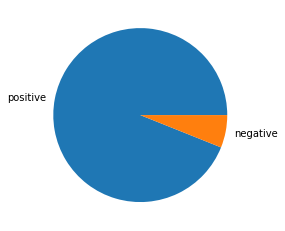

In [73]:
for i in ccdata.Comp:
    get_val=i
    if(float(get_val)<(0.2)):
        nega=nega+1
    if(float(get_val>(0.7))):
        posi=posi+1
    xy=xy+1
posper=(posi/(posi+nega))*100
negper=(nega/(posi+nega))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [74]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [75]:
train_start_index = '0'
train_end_index = '6'
test_start_index = '7'
test_end_index = '9'
train = df_.loc[train_start_index : train_end_index]
test = df_.loc[test_start_index:test_end_index]

In [76]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [77]:
print(numpy_df_train)

[[0.025 0.159]
 [0.    0.088]
 [0.02  0.025]
 [0.005 0.194]]


In [78]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [79]:
print(numpy_df_test)

[[0.006 0.15 ]
 [0.007 0.125]]


In [80]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
1     243
2     238
5     242
6     239


In [113]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

<ipython-input-113-e678b15f23b6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


In [116]:
print(prediction)

[[239.47]
 [239.24]]


In [122]:
print(prediction)

[[239.47]
 [239.24]]


In [132]:
idx=np.arange(int(test_start_index),int(test_end_index))

In [133]:
predictions_df_ = pd.DataFrame(data=prediction[:], index = idx, columns=['Prices'])

In [134]:
predictions_df_

,Prices
7,239.47
8,239.24


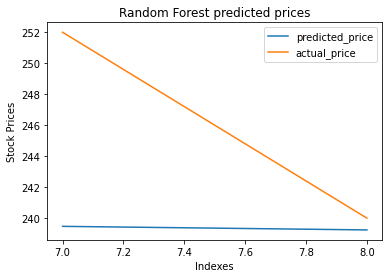

In [135]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [136]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [137]:
reg.predict(numpy_df_test)

array([[239.2],
       [239.4]])

In [ ]:
'''Since our dataset is very small and as you can see that 
fetching 600 tweets could only make data for just 10 days.
Also the prediction is not very great in such small dataset. 
So we found this new dataset on internet which has the Text as "Tweets"
and respective "close price" and "Adjusted close price".
Adjusted Close Price: An adjusted closing price is a stock's 
closing price on any given day of trading that has been amended to 
include any distributions and corporate actions that occurred at any 
time before the next day's open.'''